## Introduction

This project is to explore affortbale housing in the city of Chicago. We would like to see if there is a disproportion in the avaiability of affortable housing amongst differnt neighborhoods. We will use this information to train a model to evaluate / predict an affortable housing rating given a zipcode.

The rental housing developments in the dataset are among the thousands of affordable units that are supported by City of Chicago programs to maintain affordability in local neighborhoods. This dataset is updated monthly.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. 

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There is 1 csv file in the current version of the dataset:


In [3]:
print(os.listdir('.'))

['.DS_Store', 'starter-chicago-affordable-rental-db1de52c-7.ipynb', 'affordable-rental-housing-developments.csv', 'socrata_metadata.json', '.ipynb_checkpoints']


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [4]:
# Plot the PCA with either 2 or 3 reduced components
def plotPCA(df, nComponents):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    df = df.dropna('columns') # drop columns with NaN
    if df.shape[1] < nComponents:
        print(f'No PCA graph shown: The number of numeric columns ({df.shape[1]}) is less than the number of PCA components ({nComponents})')
        return
    df = df.astype('float64') # Cast to float for sklearn functions
    df = StandardScaler().fit_transform(df) # Standardize features by removing the mean and scaling to unit variance
    pca = PCA(n_components = nComponents)
    principalComponents = pca.fit_transform(df)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component ' + str(i) for i in range(1, nComponents + 1)])
    fig = plt.figure(figsize = (8, 8))
    if (nComponents == 3):
        ax = fig.add_subplot(111, projection = '3d')
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_zlabel('Principal Component 3', fontsize = 15)
        ax.set_title('3 component PCA', fontsize = 20)
        ax.scatter(xs = principalDf.iloc[:, 0], ys = principalDf.iloc[:, 1], zs = principalDf.iloc[:, 2])
    else:
        ax = fig.add_subplot(111)
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('2 component PCA', fontsize = 20)
        ax.scatter(x = principalDf.iloc[:, 0], y = principalDf.iloc[:, 1])


In [5]:
# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [6]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [7]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: ../input/affordable-rental-housing-developments.csv

In [8]:
nRowsRead = None # specify 'None' if want to read whole file
# affordable-rental-housing-developments.csv has 389 rows in reality, but we are only loading/previewing the first 100 rows
df1 = pd.read_csv('affordable-rental-housing-developments.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'affordable-rental-housing-developments.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 428 rows and 19 columns


Let's take a quick look at what the data looks like:

In [9]:
df1.head(5)

,Community Area Name,Community Area Number,Property Type,Property Name,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location,Historical Wards 2003-2015,Wards,Community Areas,Zip Codes,Census Tracts
0,Portage Park,15,ARO,4812-15 W. Montrose Apts.,4812-15 W. Montrose Ave.,60641,630-694-6968,@properties,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,West Englewood,67,Multifamily,New West Englewood Homes,2109 W. 63rd St.,60636,773-434-4929,Interfaith Housing Corp.,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Englewood,68,Multifamily,Antioch Homes II,301 W. Marquette Road,60621,773-994-4546,"Universal Management Service, Inc.",69,1.175445e+06,1.860492e+06,41.772564,-87.632419,"{'latitude': '41.7725637689', 'longitude': '-8...",31.0,32.0,66.0,21559.0,479.0
3,Washington Park,40,Senior HUD 202,St. Edmund's Corners,5556 S. Michigan Ave.,60637,773-667-7583,St. Edmund's Redevelopment Corp.,53,1.178070e+06,1.867952e+06,41.792975,-87.622569,"{'latitude': '41.7929745219', 'longitude': '-8...",53.0,4.0,7.0,22260.0,403.0
4,Humboldt Park,23,Multifamily,Nelson Mandela Apts.,526 N. Troy St.,60624,773-227-6332,Bickerdike Apts.,6,1.155238e+06,1.903559e+06,41.891173,-87.705338,"{'latitude': '41.8911727354', 'longitude': '-8...",41.0,46.0,24.0,21184.0,177.0


Histogram of sampled columns:

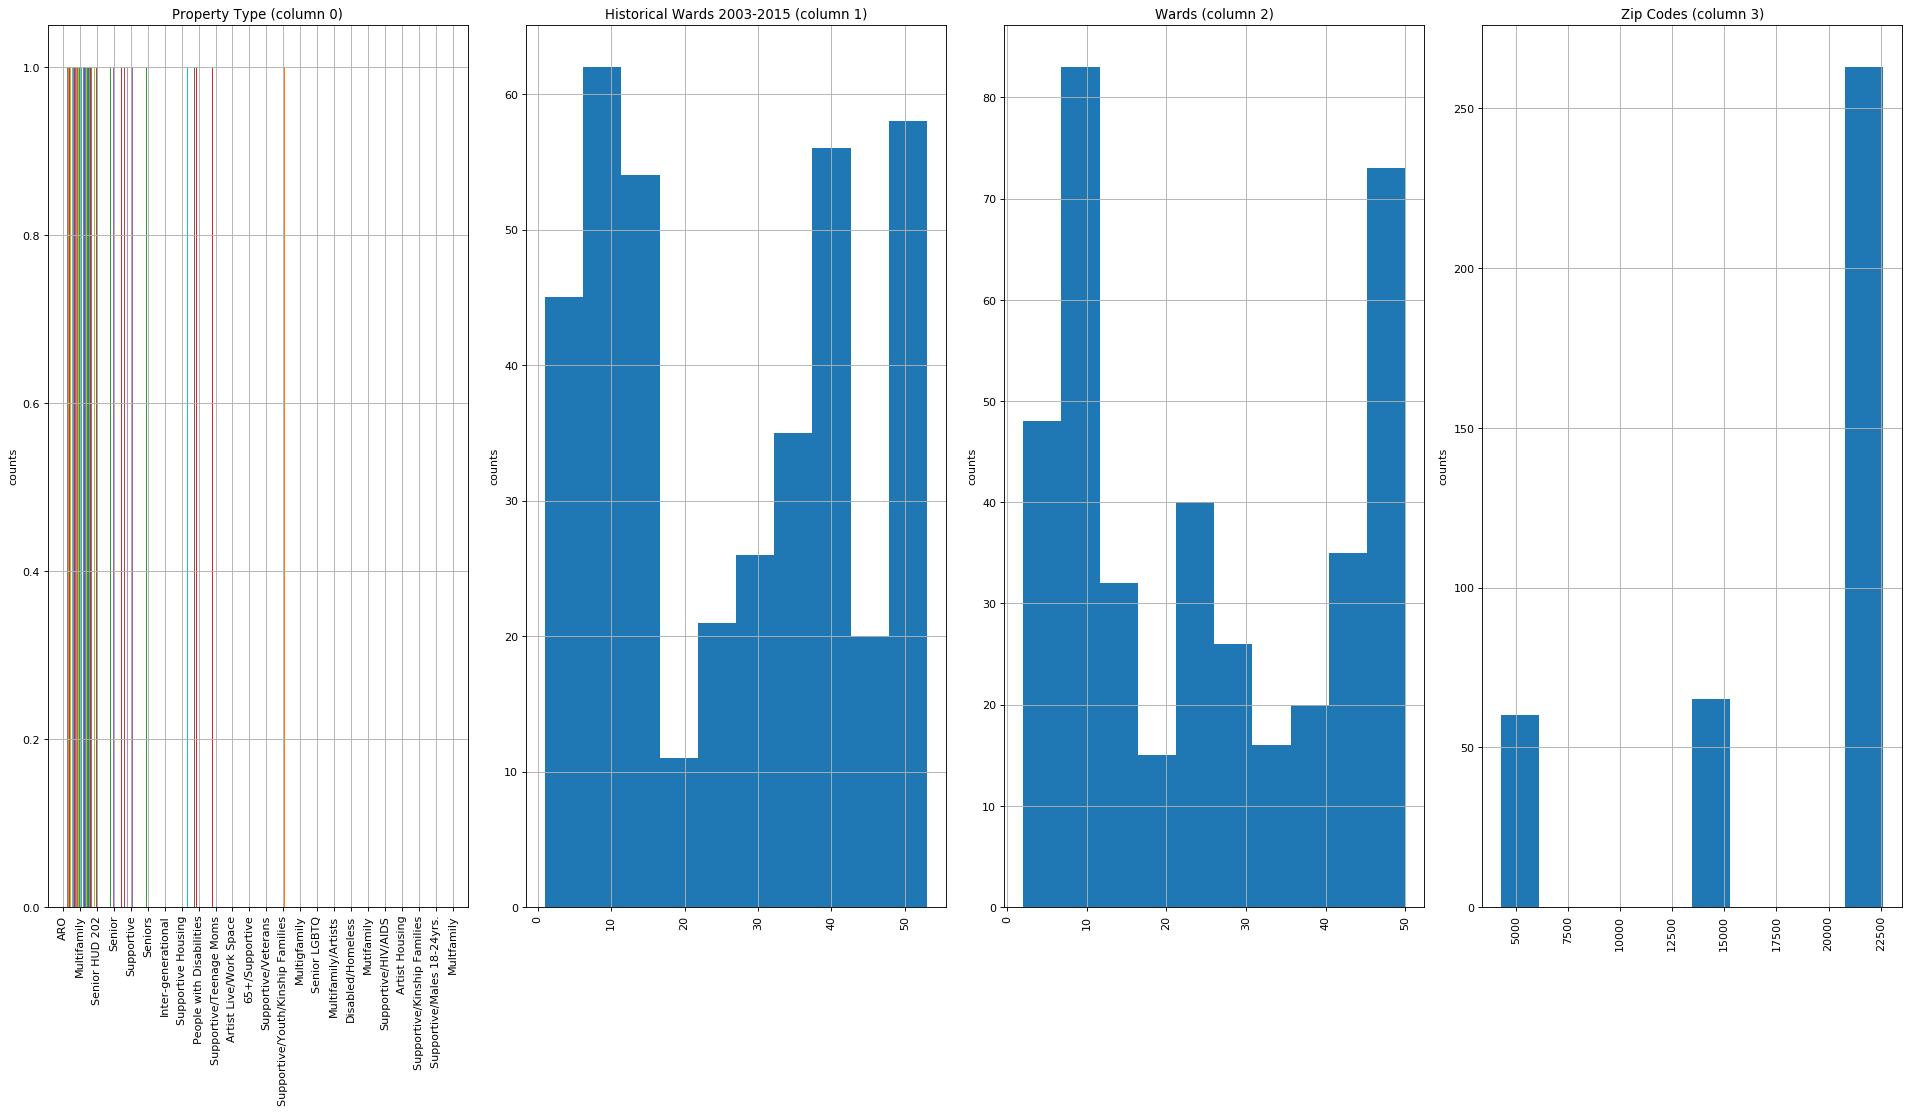

In [25]:
plotHistogram(df1, 4, 4)

Correlation matrix:

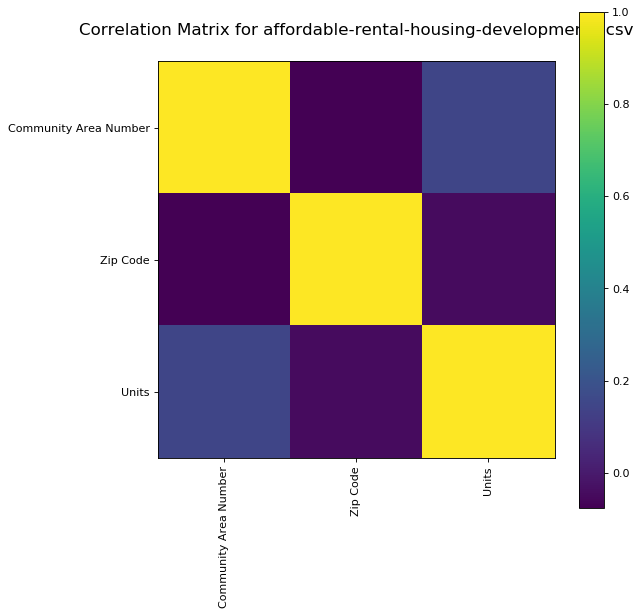

In [11]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

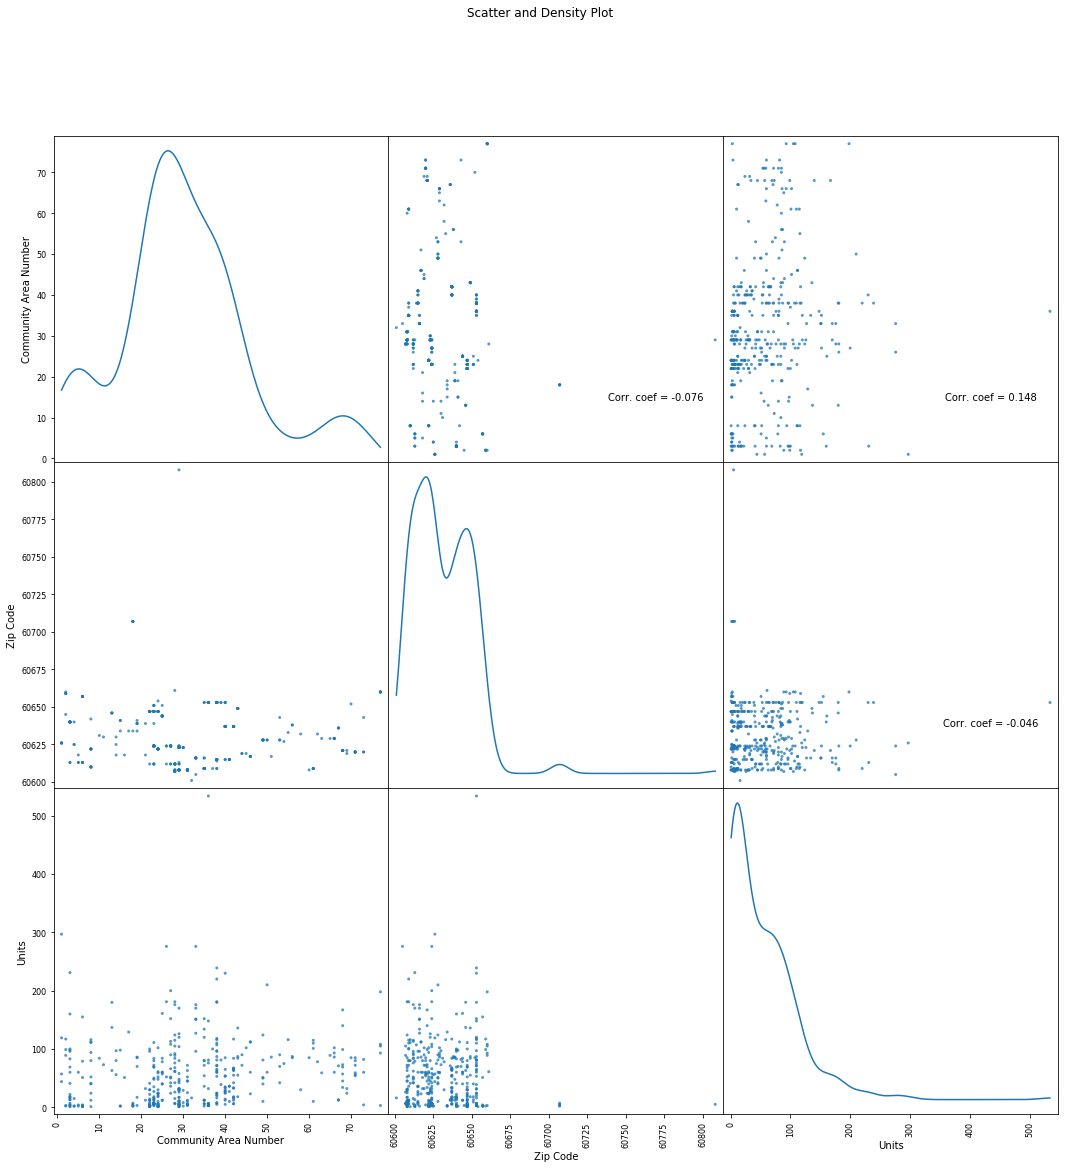

In [12]:
plotScatterMatrix(df1, 18, 10)

2D and 3D PCA Plots

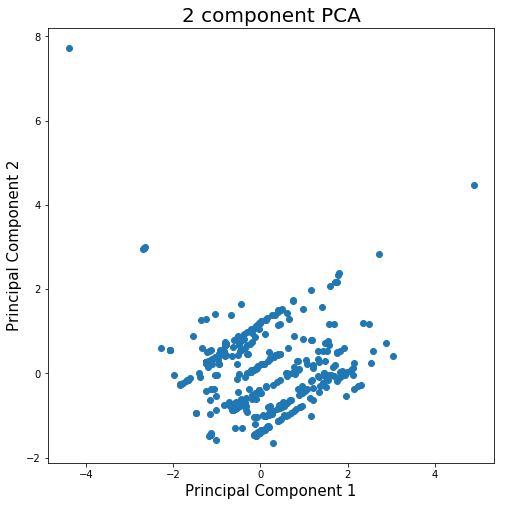

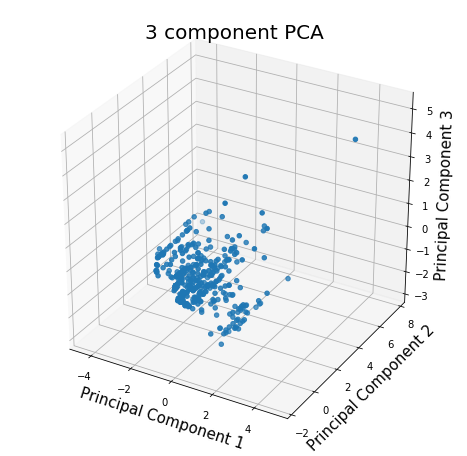

In [13]:
plotPCA(df1, 2) # 2D PCA
plotPCA(df1, 3) # 3D PCA

## Data Preprocess

After visualizing the data, let's use zipcode and number of units as starting points.

In [16]:
print(df1.columns)

Index(['Community Area Name', 'Community Area Number', 'Property Type',
       'Property Name', 'Address', 'Zip Code', 'Phone Number',
       'Management Company', 'Units', 'X Coordinate', 'Y Coordinate',
       'Latitude', 'Longitude', 'Location', 'Historical Wards 2003-2015',
       'Wards', 'Community Areas', 'Zip Codes', 'Census Tracts'],
      dtype='object')


In [17]:
print(df1.index)

RangeIndex(start=0, stop=428, step=1)


In [21]:
print(df1['Zip Code'])

0      60641
1      60636
2      60621
3      60637
4      60624
5      60615
6      60640
7      60649
8      60613
9      60612
10     60630
11     60609
12     60640
13     60622
14     60647
15     60647
16     60610
17     60608
18     60628
19     60620
20     60624
21     60609
22     60629
23     60608
24     60608
25     60644
26     60659
27     60659
28     60624
29     60624
       ...  
398    60608
399    60637
400    60622
401    60649
402    60637
403    60624
404    60616
405    60644
406    60640
407    60608
408    60621
409    60624
410    60647
411    60808
412    60637
413    60653
414    60647
415    60612
416    60612
417    60617
418    60640
419    60624
420    60643
421    60653
422    60628
423    60622
424    60616
425    60637
426    60608
427    60615
Name: Zip Code, Length: 428, dtype: int64


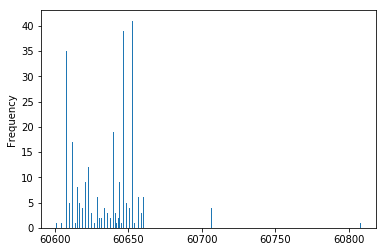

In [34]:
ax = df1['Zip Code'].plot.hist(bins=400)